In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Moscow_2021.csv', sep=';', parse_dates=['2021'], dayfirst=True, index_col='2021')
df = df.drop(['Length', 'Change'], axis=1)
df.loc[:, ['AT_east', 'AT_west', 'NT_east', 'NT_west']] = df.loc[:, ['AT_east', 'AT_west',
                                                                    'NT_east', 'NT_west']].mask(df == '?', None)
df.head(2)

,Sunrise,Noon,Sunset,AT_east,NT_east,CT_east,CT_west,NT_west,AT_west
2021,,,,,,,,,
2021-01-01,9:00:29,12:34:13,16:07:58,6:40:27,7:25:37,8:14:03,16:54:24,17:42:50,18:28:00
2021-01-02,9:00:12,12:34:41,16:09:10,6:40:24,7:25:31,8:13:52,16:55:29,17:43:51,18:28:58


In [3]:
df_time = df.copy()
for column in df_time.columns:
    df_time[column] = pd.to_datetime(df_time[column], format='%H:%M:%S').dt.time
df_time.head(2)

,Sunrise,Noon,Sunset,AT_east,NT_east,CT_east,CT_west,NT_west,AT_west
2021,,,,,,,,,
2021-01-01,09:00:29,12:34:13,16:07:58,06:40:27,07:25:37,08:14:03,16:54:24,17:42:50,18:28:00
2021-01-02,09:00:12,12:34:41,16:09:10,06:40:24,07:25:31,08:13:52,16:55:29,17:43:51,18:28:58


In [4]:
dfn = df.copy()
for column in dfn.columns:
    dfn[column] = pd.to_numeric(dfn[column].apply(pd.Timedelta))*1.6666666666667e-11
dfn = dfn.mask(dfn < 0, None)
dfn = dfn[['AT_east', 'NT_east', 'CT_east', 'Sunrise', 'Noon', 'Sunset', 'CT_west', 'NT_west', 'AT_west']]
dfn.head(2)

,AT_east,NT_east,CT_east,Sunrise,Noon,Sunset,CT_west,NT_west,AT_west
2021,,,,,,,,,
2021-01-01,400.45,445.616667,494.050000,540.483333,754.216667,967.966667,1014.400000,1062.833333,1108.0
2021-01-02,400.4,445.516667,493.866667,540.200000,754.683333,969.166667,1015.483333,1063.85,1108.966667


In [5]:
df_bar = dfn.iloc[:, 2:7]
df_bar.head(2)

,CT_east,Sunrise,Noon,Sunset,CT_west
2021,,,,,
2021-01-01,494.050000,540.483333,754.216667,967.966667,1014.400000
2021-01-02,493.866667,540.200000,754.683333,969.166667,1015.483333


In [6]:
df_bar['New_Sunrise'] = df_bar['Sunrise'] - df_bar['CT_east']
df_bar['New_Noon'] = df_bar['Noon'] - df_bar['Sunrise']
df_bar['New_Sunset'] = df_bar['Sunset'] - df_bar['Noon']
df_bar['New_CT_west'] = df_bar['CT_west'] - df_bar['Sunset']
df_bar['Midnight'] = 1440 - df_bar['CT_west']
df_bar.head(3)

,CT_east,Sunrise,Noon,Sunset,CT_west,New_Sunrise,New_Noon,New_Sunset,New_CT_west,Midnight
2021,,,,,,,,,,
2021-01-01,494.050000,540.483333,754.216667,967.966667,1014.400000,46.433333,213.733333,213.750000,46.433333,425.600000
2021-01-02,493.866667,540.200000,754.683333,969.166667,1015.483333,46.333333,214.483333,214.483333,46.316667,424.516667
2021-01-03,493.650000,539.850000,755.133333,970.416667,1016.616667,46.200000,215.283333,215.283333,46.200000,423.383333


In [49]:
p1_labels = pd.to_datetime(df['CT_east']).dt.strftime('%H:\n%M')
p2_labels = pd.to_datetime(df['Sunrise']).dt.strftime('%H:\n%M')
p3_labels = pd.to_datetime(df['Noon']).dt.strftime('%H:\n%M')
p4_labels = pd.to_datetime(df['Sunset']).dt.strftime('%H:\n%M')
p5_labels = pd.to_datetime(df['CT_west']).dt.strftime('%H:\n%M')

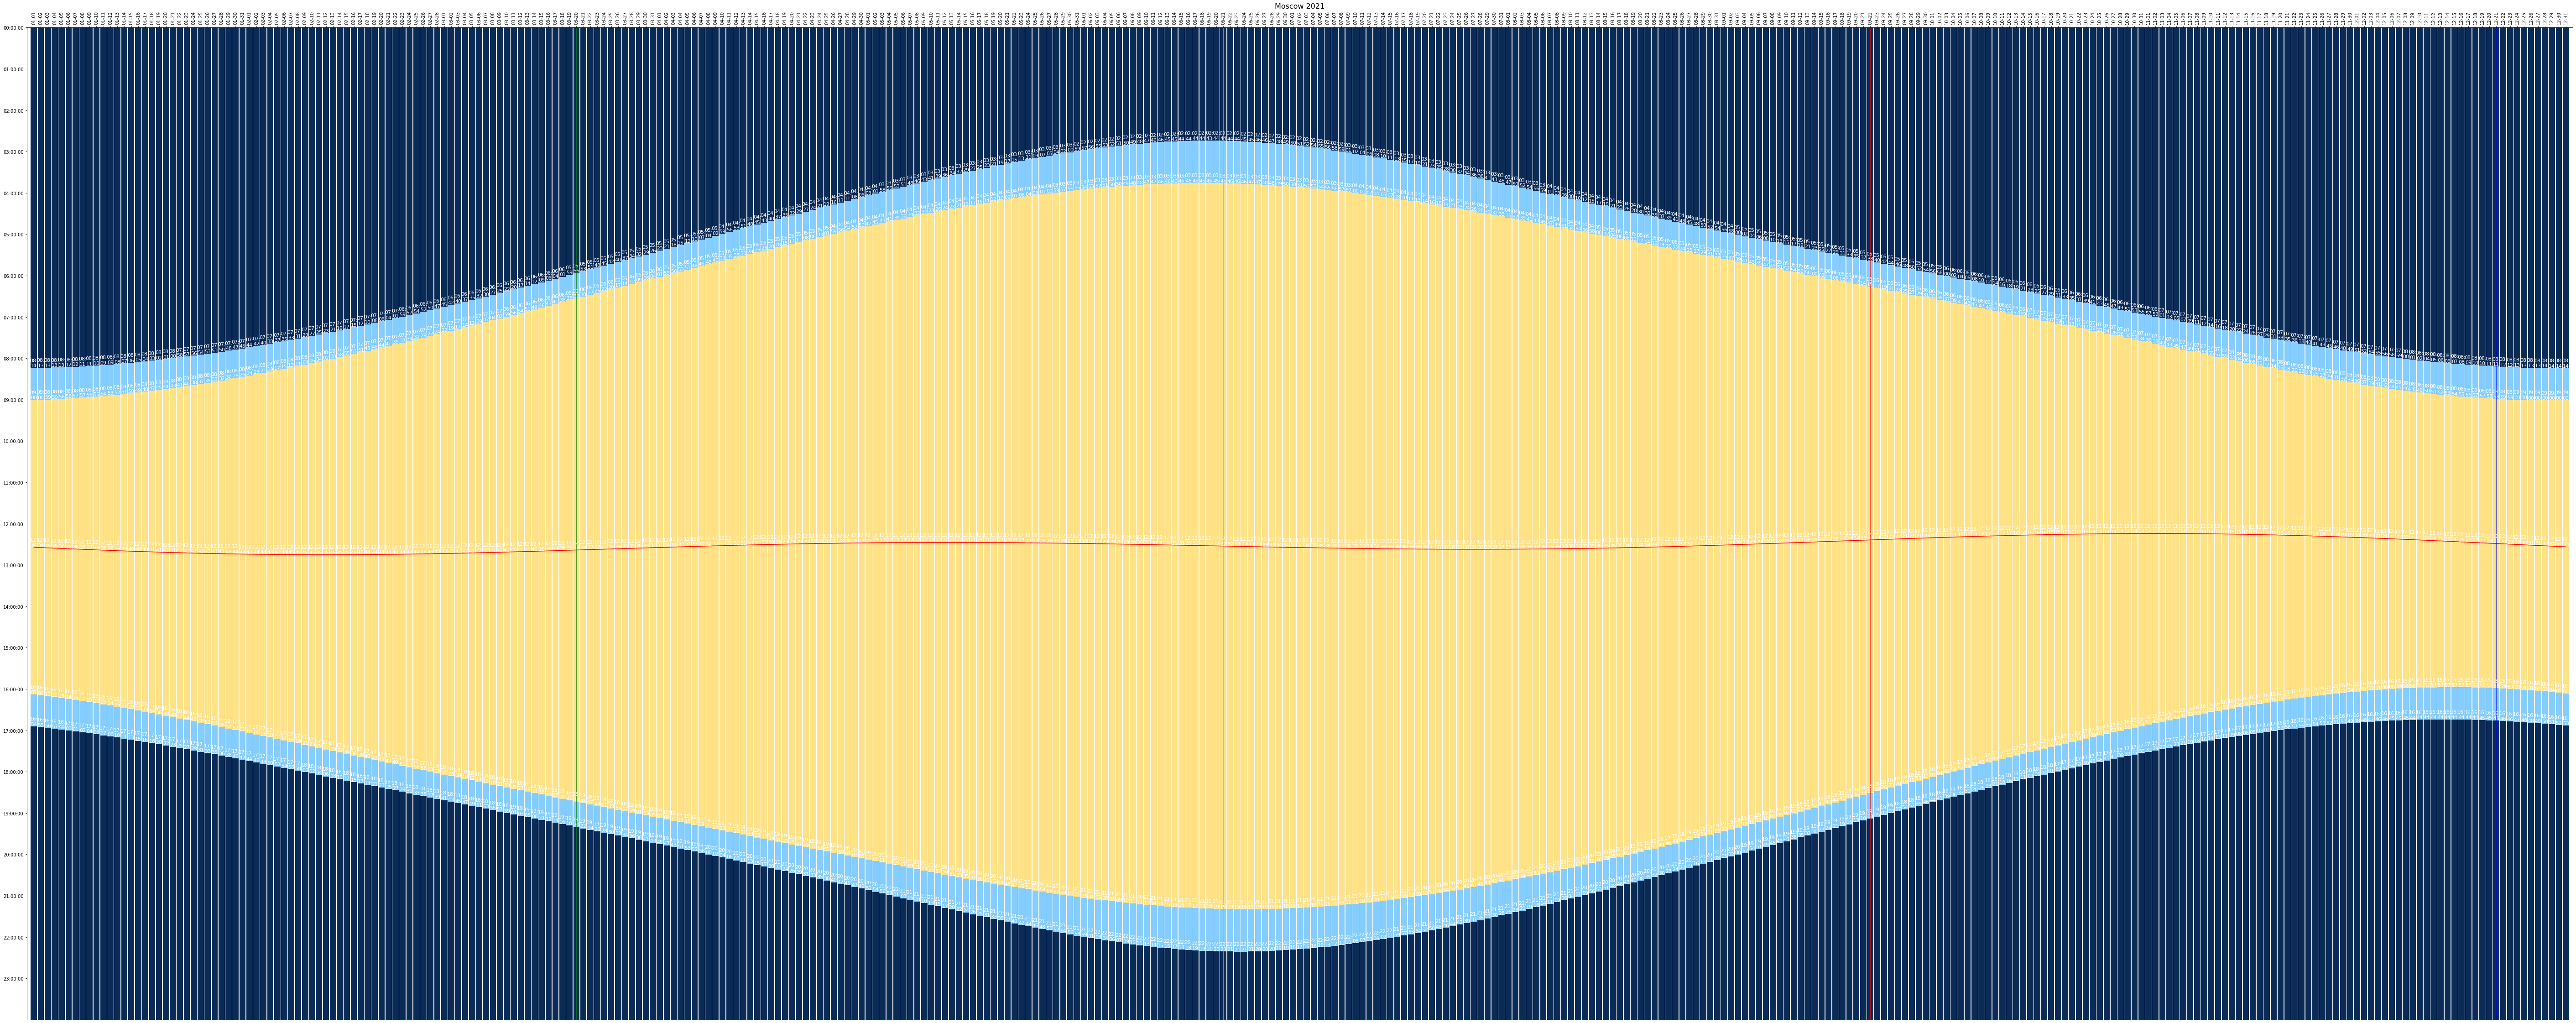

In [58]:
fig, ax = plt.subplots(figsize=(100, 40))
plt.title('Moscow 2021', size=16)
x = df_bar.index
w = 0.9

p1 = ax.bar(x, df_bar['CT_east'], color='#0b2b57', width=w)
p2 = ax.bar(x, df_bar['New_Sunrise'], bottom=np.array(df_bar['CT_east']), color='#85cdff', width=w)
p3 = ax.bar(x, df_bar['New_Noon'], color='#ffe186', width=w,
       bottom=np.array(df_bar['New_Sunrise'])+
              np.array(df_bar['CT_east']))
p4 = ax.bar(x, df_bar['New_Sunset'], color='#ffe186', width=w,
       bottom=np.array(df_bar['New_Sunrise'])+
              np.array(df_bar['CT_east'])+
              np.array(df_bar['New_Noon']))
p5 = ax.bar(x, df_bar['New_CT_west'], color='#85cdff', width=w,
       bottom=np.array(df_bar['New_Sunrise'])+
              np.array(df_bar['CT_east'])+
              np.array(df_bar['New_Noon'])+
              np.array(df_bar['New_Sunset']))
ax.bar(x, df_bar['Midnight'], color='#0b2b57', width=w,
       bottom=np.array(df_bar['New_Sunrise'])+
              np.array(df_bar['CT_east'])+
              np.array(df_bar['New_Noon'])+
              np.array(df_bar['New_Sunset'])+
              np.array(df_bar['New_CT_west']))
ax.plot(x, df_bar['Noon'], color='red')
plt.axvline(pd.to_datetime('2021-03-20'), color='green', label='Spring Equinox')
plt.axvline(pd.to_datetime('2021-06-21'), color='orange', label='Summer Solstice')
plt.axvline(pd.to_datetime('2021-09-22'), color='red', label='Fall Equinox')
plt.axvline(pd.to_datetime('2021-12-21'), color='blue', label='Winter Solstice')

ax.bar_label(p1, labels=p1_labels, label_type='edge', color='white', size=11)
ax.bar_label(p2, labels=p2_labels, label_type='edge', color='white', size=11)
ax.bar_label(p3, labels=p3_labels, label_type='edge', color='white', size=11)
ax.bar_label(p4, labels=p4_labels, label_type='edge', color='white', size=11)
ax.bar_label(p5, labels=p5_labels, label_type='edge', color='white', size=11)
ax.xaxis.tick_top()

plt.xlim(x[0]-pd.Timedelta(days=1), x[-1]+pd.Timedelta(days=1))
plt.xticks(x, labels=x.strftime('%m-%d'),rotation='vertical')
plt.yticks(np.arange(0, 1440, 60), labels=pd.date_range('00:00','23:59', freq='60min').time)
plt.ylim(1440, 0)
plt.savefig('Moscow_2021.jpeg')
plt.show()

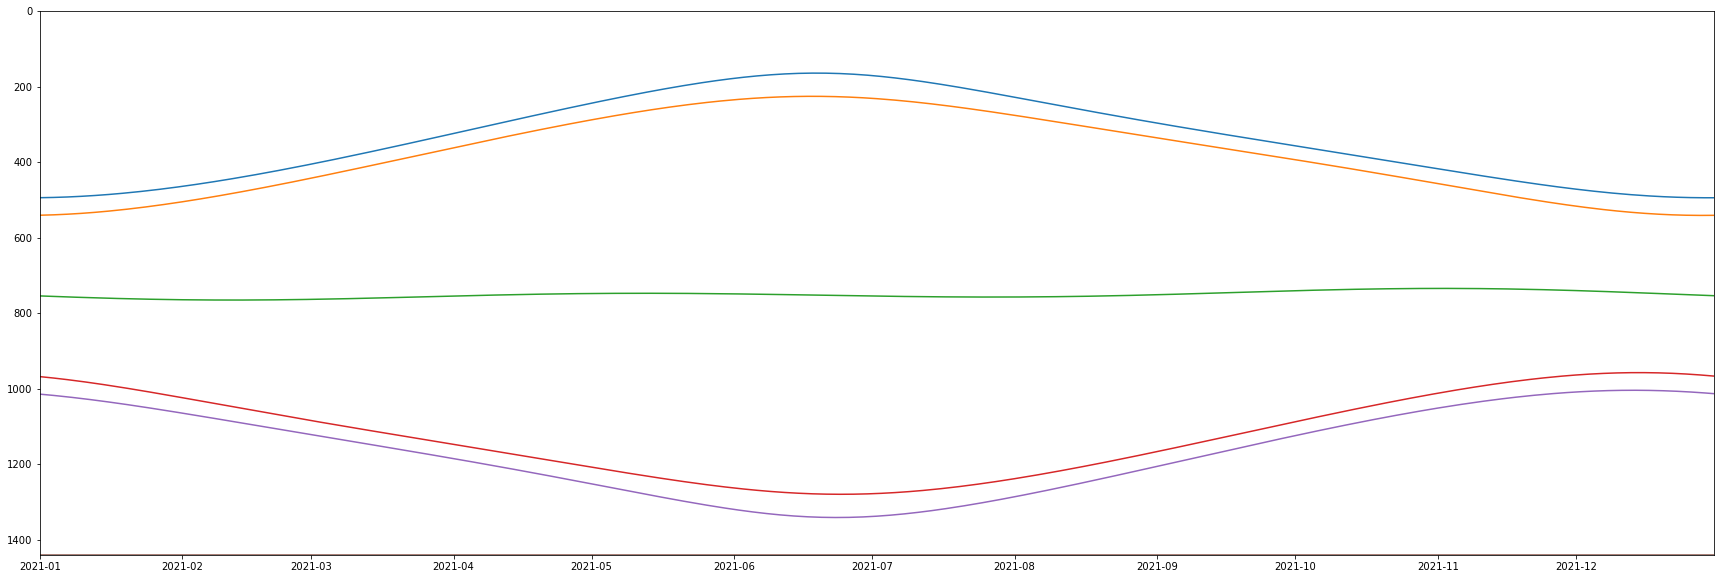

In [8]:
fig, ax = plt.subplots(figsize=(30, 10))
x = dfn.index

ax.plot(x, dfn['CT_east'])
ax.plot(x, dfn['Sunrise'])
ax.plot(x, dfn['Noon'])
ax.plot(x, dfn['Sunset'])
ax.plot(x, dfn['CT_west'])
ax.plot(x, [1440]*len(x))

plt.xlim(x[0], x[-1])
plt.ylim(1440, 0)
plt.show()